In [80]:
import numpy as np
import matplotlib.pyplot as plt

XOR Dataset:

Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Expected Outputs:
[0 1 1 0]


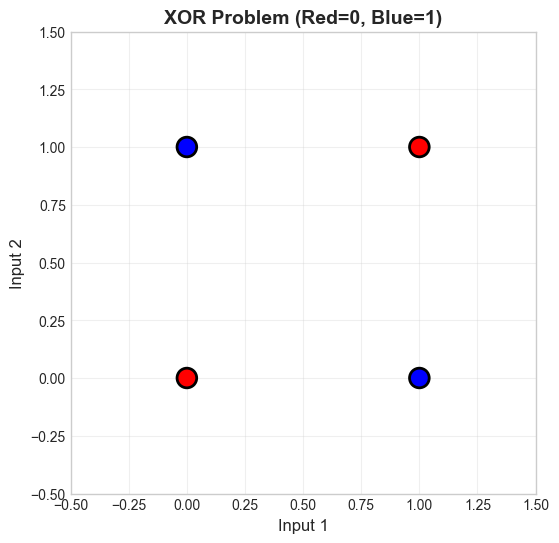


Note: XOR is not linearly separable - requires hidden layers!


In [81]:
# XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

print("XOR Dataset:")
print("\nInputs:")
print(X)
print("\nExpected Outputs:")
print(y.flatten())

# Visualize XOR problem
plt.figure(figsize=(6, 6))
colors = ['red' if label == 0 else 'blue' for label in y.flatten()]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=200, edgecolors='black', linewidth=2)
plt.xlabel('Input 1', fontsize=12)
plt.ylabel('Input 2', fontsize=12)
plt.title('XOR Problem (Red=0, Blue=1)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

print("\nNote: XOR is not linearly separable - requires hidden layers!")

In [82]:

def sigmoid(x):
    """Sigmoid activation function."""
    # Clip input to avoid overflow in exp
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of the sigmoid function."""
    return x * (1 - x)

def tanh(x):
    """Tanh activation function."""
    return np.tanh(x)

def tanh_derivative(x):
    """Derivative of the tanh function."""
    return 1 - np.power(x, 2)

def relu(x):
    """ReLU activation function."""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of the ReLU function."""
    return np.where(x > 0, 1, 0)


In [ ]:

# 2. Neural Network 
class NeuralNetworkXOR:
    """A simple Neural Network with one hidden layer to solve the XOR problem."""
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        # Architecture setup
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        
        np.random.seed(42) 
        init_scale = 0.1
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * init_scale
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * init_scale
        self.b2 = np.zeros((1, self.output_size))
        
        
        self.activation_name = activation
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_deriv = sigmoid_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_deriv = relu_derivative
            
    def forward(self, X):
        """Computes the forward pass of the network."""
        # Hidden layer computation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activation(self.z1)
        
        # Output layer computation 
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate):
        """
        Computes the backward pass and updates weights and biases using gradient descent.
        """
        m = X.shape[0]  
        # For MSE loss: dLoss/dOutput = (output - y)
        output_error = (output - y)
        # Gradient of the output layer (error * derivative of sigmoid activation)
        output_delta = output_error * sigmoid_derivative(output)

        # --- Hidden Layer Gradients ---
        # Propagate error back to the hidden layer
        hidden_error = output_delta.dot(self.W2.T)
        # Gradient of the hidden layer (derivative expects activation value for sigmoid/tanh)
        hidden_delta = hidden_error * self.activation_deriv(self.a1)

        #  Update Weights and Biases 
        dW2 = (self.a1.T.dot(output_delta)) / m
        db2 = np.sum(output_delta, axis=0, keepdims=True) / m
        dW1 = (X.T.dot(hidden_delta)) / m
        db1 = np.sum(hidden_delta, axis=0, keepdims=True) / m

        
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs=10000, learning_rate=1.0):
        """Trains the network for a specified number of epochs."""
        self.loss_history = []
        for epoch in range(epochs):
            output = self.forward(X)
            # Perform a backward pass and update parameters
            self.backward(X, y, output, learning_rate)
            
            # Calculate Mean Squared Error loss
            loss = np.mean(np.square(y - output))
            self.loss_history.append(loss)
            
            if (epoch + 1) % 1000 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss ({self.activation_name}): {loss:.6f}")
                
    def predict(self, X):
        """Make predictions on new data."""
        output = self.forward(X)
        # Classify as 1 if output is > 0.5, otherwise 0
        return (output > 0.5).astype(int)


In [ ]:
#  3. Training 

# XOR Dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Parameters
epochs = 75000
learning_rate = 1

In [ ]:
activations_to_test = ['sigmoid', 'tanh', 'relu']
trained_models = {}
loss_curves = {}

for activation_func in activations_to_test:
    print(f"\n--- Training with {activation_func.upper()} Activation ---")
    model = NeuralNetworkXOR(input_size=2, hidden_size=2, output_size=1, activation=activation_func)
    model.train(X, y, epochs=epochs, learning_rate=learning_rate)
    trained_models[activation_func] = model
    loss_curves[activation_func] = model.loss_history


--- Training with SIGMOID Activation ---
Epoch 1000/75000, Loss (sigmoid): 0.250000
Epoch 2000/75000, Loss (sigmoid): 0.250000
Epoch 3000/75000, Loss (sigmoid): 0.250000
Epoch 4000/75000, Loss (sigmoid): 0.250000
Epoch 5000/75000, Loss (sigmoid): 0.250000
Epoch 6000/75000, Loss (sigmoid): 0.250000
Epoch 7000/75000, Loss (sigmoid): 0.250000
Epoch 8000/75000, Loss (sigmoid): 0.250000
Epoch 9000/75000, Loss (sigmoid): 0.250000
Epoch 10000/75000, Loss (sigmoid): 0.250000
Epoch 11000/75000, Loss (sigmoid): 0.250000
Epoch 12000/75000, Loss (sigmoid): 0.250000
Epoch 13000/75000, Loss (sigmoid): 0.250000
Epoch 14000/75000, Loss (sigmoid): 0.250000
Epoch 15000/75000, Loss (sigmoid): 0.250000
Epoch 16000/75000, Loss (sigmoid): 0.250000
Epoch 17000/75000, Loss (sigmoid): 0.250000
Epoch 18000/75000, Loss (sigmoid): 0.250000
Epoch 19000/75000, Loss (sigmoid): 0.250000
Epoch 20000/75000, Loss (sigmoid): 0.250000
Epoch 21000/75000, Loss (sigmoid): 0.250000
Epoch 22000/75000, Loss (sigmoid): 0.250000


--- Plotting Loss vs. Epochs ---


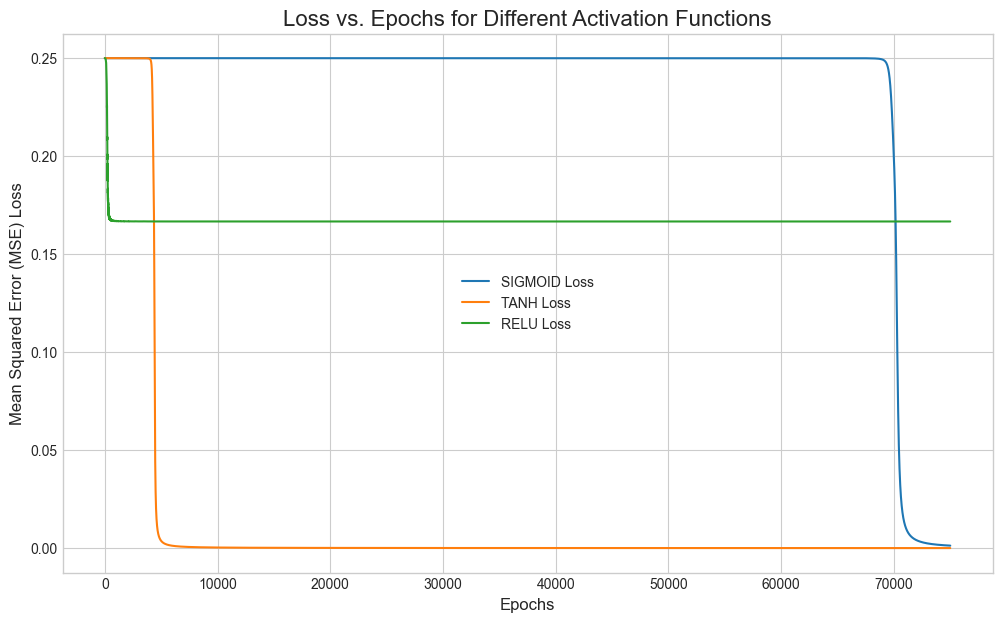

In [86]:

# --- 4. Loss Visualization ---
print("\n--- Plotting Loss vs. Epochs ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
for activation_func, losses in loss_curves.items():
    plt.plot(losses, label=f'{activation_func.upper()} Loss')

plt.title('Loss vs. Epochs for Different Activation Functions', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Mean Squared Error (MSE) Loss', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

print("\n--- Final Results and Accuracy ---")
for activation_func, model in trained_models.items():
    print(f"\n--- Results for {activation_func.upper()} ---")
    
    # Final Weights
    print(f"Final Hidden Layer Weights (W1):\n{model.W1}")
    print(f"Final Hidden Layer Biases (b1):\n{model.b1}")
    print(f"Final Output Layer Weights (W2):\n{model.W2}")
    print(f"Final Output Layer Biases (b2):\n{model.b2}")
    
    # Predictions and Accuracy
    predictions = model.predict(X)

    accuracy = np.mean(predictions == y) * 100
    print("----" *20)
    print(f"Accuracy: {accuracy:.2f}%")
    print("----" *20)

    print("Input | Expected Output | Predicted Output")
    print("------------------------------------------")
    for i in range(len(X)):
        print(f"{X[i]}  |        {y[i][0]}        |         {predictions[i][0]}")


--- Final Results and Accuracy ---

--- Results for SIGMOID ---
Final Hidden Layer Weights (W1):
[[-5.15378829 -5.82472927]
 [ 4.93585682  5.89857318]]
Final Hidden Layer Biases (b1):
[[-2.68184482  2.99418815]]
Final Output Layer Weights (W2):
[[ 8.32187182]
 [-7.79563552]]
Final Output Layer Biases (b2):
[[3.60196209]]
--------------------------------------------------------------------------------
Accuracy: 100.00%
--------------------------------------------------------------------------------
Input | Expected Output | Predicted Output
------------------------------------------
[0 0]  |        0        |         0
[0 1]  |        1        |         1
[1 0]  |        1        |         1
[1 1]  |        0        |         0

--- Results for TANH ---
Final Hidden Layer Weights (W1):
[[-3.53839104 -3.67940837]
 [ 3.44063304  3.74345103]]
Final Hidden Layer Biases (b1):
[[-1.65186036  1.78434885]]
Final Output Layer Weights (W2):
[[ 5.8756052 ]
 [-5.84673687]]
Final Output Layer Biase